<a href="https://colab.research.google.com/github/pejmanrasti/EPU_ML_Angers_2023/blob/main/Jour_2/EPU_2_TraitementDesDonnees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**3. Analyser les données**

#Etude et préparation des données

In [ ]:
import pandas as pd
from pandas import read_csv
import numpy as np
import math
from numpy import arange
from sklearn.feature_selection import VarianceThreshold
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
import seaborn as sns
from numpy import arange, mean, std, percentile
from scipy import stats

## Import des données
* D'abord importer le fichier DataSet_RegionPelvienne.csv dans les fichiers du projet

In [ ]:
df = read_csv("/content/DataSet_RegionPelvienne.csv", sep = ",", header=0)
df = df.drop(columns = ["Unnamed: 0"])
df.head()

,MUperGy,MUmin,MUmax,MUstd,MUiqr,AAV,AAVmin,AAVmax,AAVstd,AAViqr,...,BImax,BIstd,BIiqr,BM,BA,BAmin,BAmax,BAstd,BAiqr,Gamma22loc10
0,286.279357,0,0.025226,0.005673,0.007483,0.212154,0.004097,0.470404,0.144776,0.252859,...,29.291912,7.922034,5.100115,0.680998,35.918076,0.7750,76.077499,24.333914,46.084374,0.995
1,286.279357,0,0.031176,0.009321,0.016940,0.199329,0.004267,0.650373,0.205439,0.346499,...,27.954796,11.082609,25.520850,0.734694,32.592787,0.7750,105.114999,33.919277,58.263750,0.990
2,237.155273,0,0.015816,0.003171,0.004838,0.363556,0.055128,0.708376,0.197273,0.294814,...,7.922318,1.369862,1.865898,0.572010,79.412440,12.9025,146.812498,40.413525,66.943749,0.999
3,237.155273,0,0.014917,0.002824,0.005359,0.248252,0.020756,0.655312,0.200993,0.298788,...,13.165829,2.779706,2.876072,0.704320,53.030225,4.4525,128.784999,38.538495,57.887499,1.000
4,273.965837,0,0.008808,0.001092,0.001163,0.330507,0.151740,0.526259,0.099290,0.141686,...,8.207767,1.269746,1.936350,0.584751,18.585518,8.4950,29.822500,5.628877,8.058750,0.987


## Suppression des données non contributives

### Variables constantes

In [ ]:
#Suppression PCM constantes
vt = VarianceThreshold()
_ = vt.fit(df)
mask = vt.get_support()
print("Features constantes supprimées : ", list(df.loc[:, ~mask].columns))
print("Total =  ", len(mask[mask==False]))
df = df.loc[:, mask]



Features constantes supprimées :  ['MUmin', 'CASmin', 'MADmin', 'MFAmin', 'SAS2min', 'SAS5min', 'SAS10min', 'SAS20min']
Total =   8


In [ ]:
df.head()

,MUperGy,MUmax,MUstd,MUiqr,AAV,AAVmin,AAVmax,AAVstd,AAViqr,LSV,...,BImax,BIstd,BIiqr,BM,BA,BAmin,BAmax,BAstd,BAiqr,Gamma22loc10
0,286.279357,0.025226,0.005673,0.007483,0.212154,0.004097,0.470404,0.144776,0.252859,0.940028,...,29.291912,7.922034,5.100115,0.680998,35.918076,0.7750,76.077499,24.333914,46.084374,0.995
1,286.279357,0.031176,0.009321,0.016940,0.199329,0.004267,0.650373,0.205439,0.346499,0.984624,...,27.954796,11.082609,25.520850,0.734694,32.592787,0.7750,105.114999,33.919277,58.263750,0.990
2,237.155273,0.015816,0.003171,0.004838,0.363556,0.055128,0.708376,0.197273,0.294814,0.928413,...,7.922318,1.369862,1.865898,0.572010,79.412440,12.9025,146.812498,40.413525,66.943749,0.999
3,237.155273,0.014917,0.002824,0.005359,0.248252,0.020756,0.655312,0.200993,0.298788,0.996320,...,13.165829,2.779706,2.876072,0.704320,53.030225,4.4525,128.784999,38.538495,57.887499,1.000
4,273.965837,0.008808,0.001092,0.001163,0.330507,0.151740,0.526259,0.099290,0.141686,0.896153,...,8.207767,1.269746,1.936350,0.584751,18.585518,8.4950,29.822500,5.628877,8.058750,0.987


### Variables fortement corrélées entre elles

In [ ]:
#Suppression des PCM trop corrélées entre elles (peuvent nuire à la sélection des variables ensuite)
# test de normalité de shapiro wilk pour sélectionner le test de corrélation adapté
variables = df.drop(columns=['Gamma22loc10'])

for pcm in variables.columns :
    shapiro_test = stats.shapiro(variables[pcm])
    p = shapiro_test.pvalue
    if(p>=0.05):
        print(pcm, " : NORMALE (", p, ")")



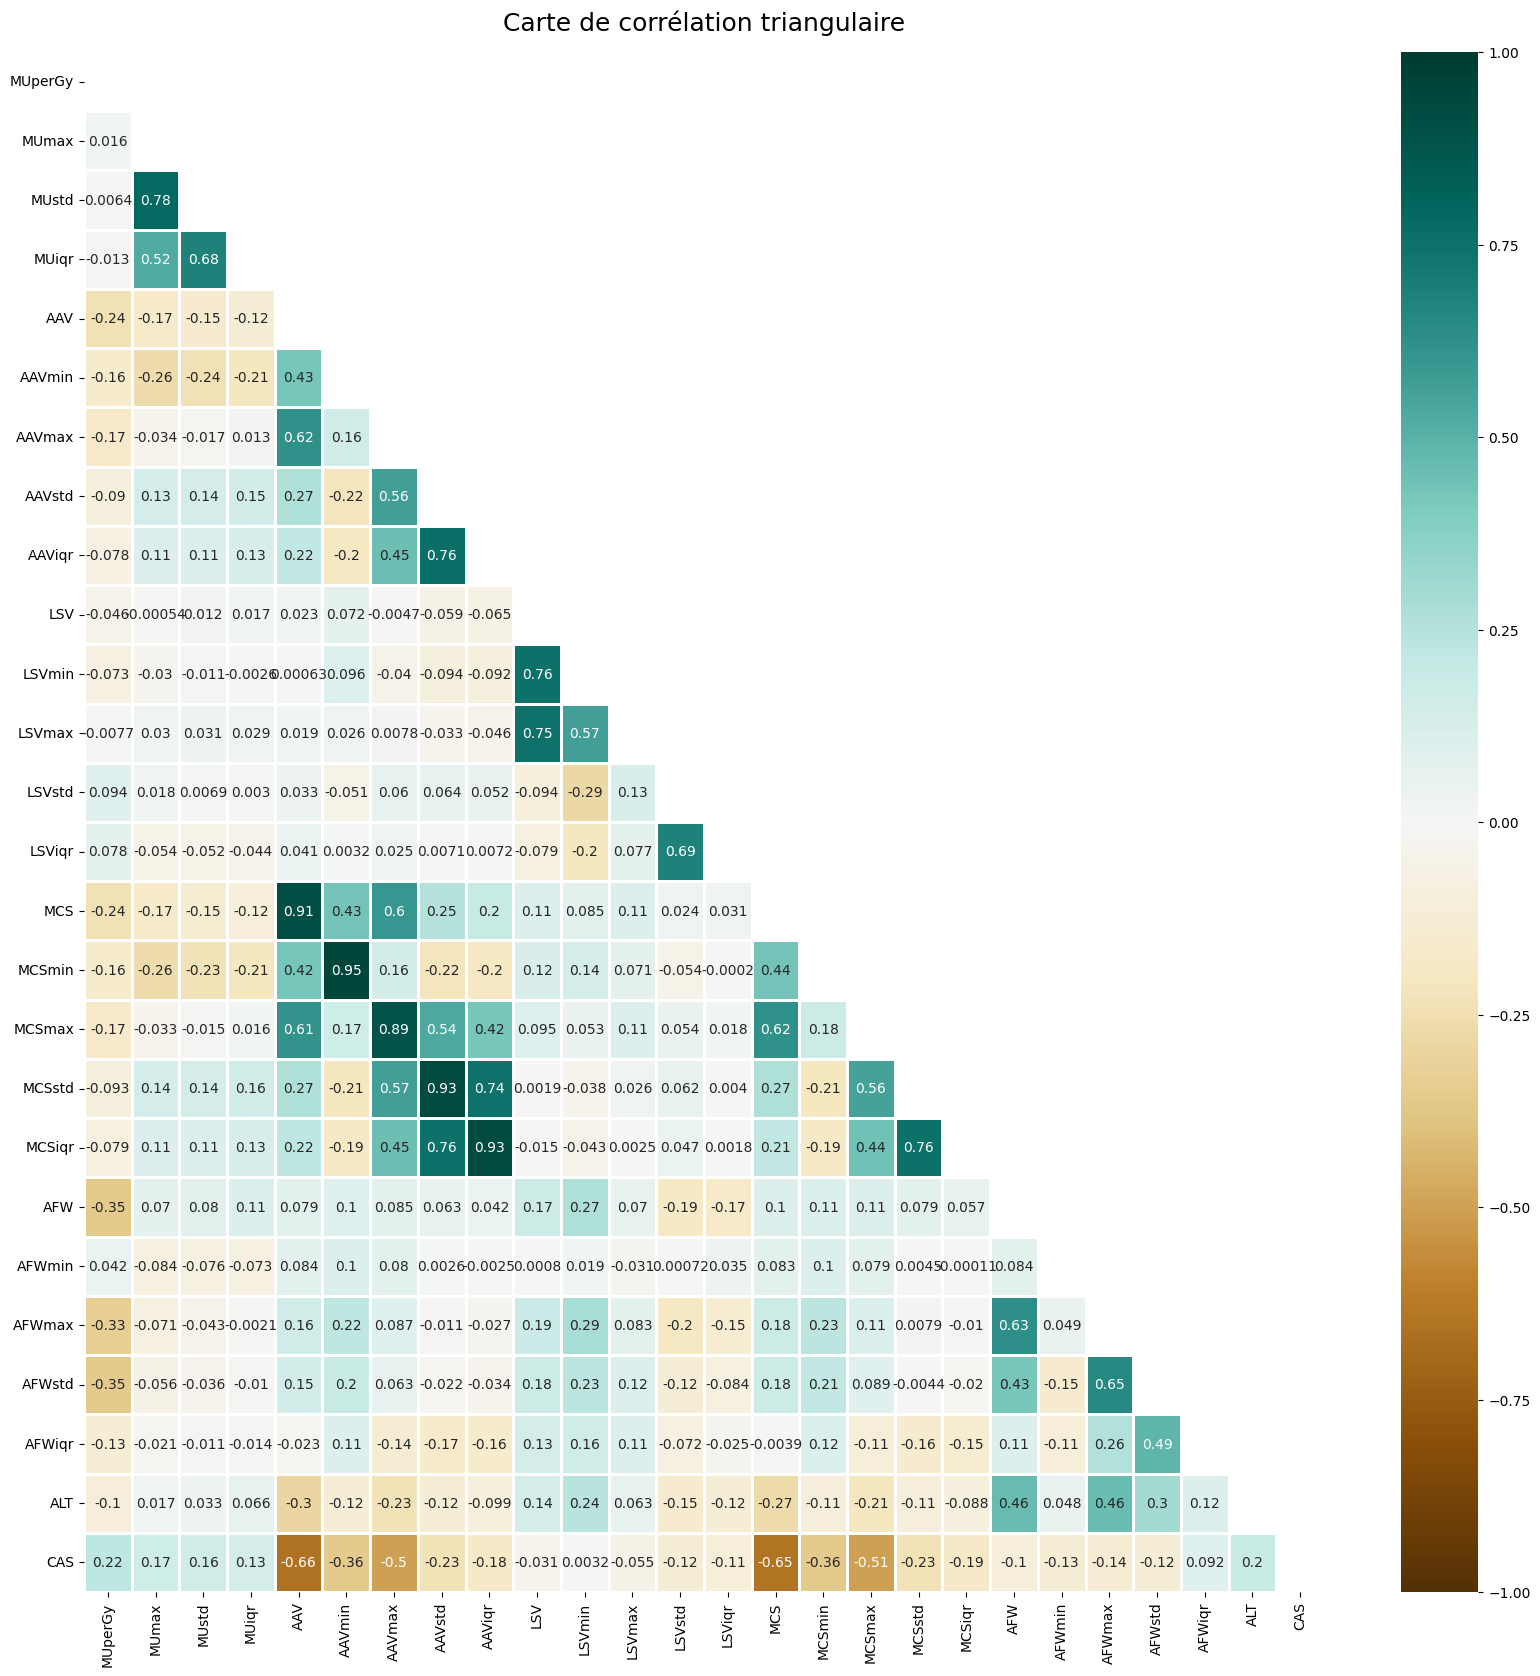

In [ ]:
#Affichage d'un extrait de la matrice de corrélation
temp = pd.DataFrame(variables, columns =['MUperGy',
 'MUmax',
 'MUstd',
 'MUiqr',
 'AAV',
 'AAVmin',
 'AAVmax',
 'AAVstd',
 'AAViqr',
 'LSV',
 'LSVmin',
 'LSVmax',
 'LSVstd',
 'LSViqr',
 'MCS',
 'MCSmin',
 'MCSmax',
 'MCSstd',
 'MCSiqr',
 'AFW',
 'AFWmin',
 'AFWmax',
 'AFWstd',
 'AFWiqr',
 'ALT',
 'CAS',])
corr_temp = temp.corr(method='kendall')
plt.figure(figsize=(20, 20))
mask = np.triu(np.ones_like(corr_temp, dtype=bool))
heatmap = sns.heatmap(corr_temp, mask=mask, vmin=-1, vmax=1, annot=True,annot_kws={"size":10}, cmap='BrBG' , linewidth=1, linecolor='w')
heatmap.set_title('Carte de corrélation triangulaire', fontdict={'fontsize':18}, pad=16);

In [ ]:
#test de corrélation de Kendall
corr_df = variables.corr(method='kendall').abs()

# matrice triangulaire supérieure
upper = corr_df.where(np.triu(np.ones(corr_df.shape), k=1).astype(bool))

# Index des colonnes avec un indice de corrélation >0.8
# Possibilité de modifier cette valeur pour tester
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

print("Features corrélées supprimées : ", to_drop)
print("Total = ", len(to_drop))

df = df.drop(columns=to_drop)

Features corrélées supprimées :  ['MCS', 'MCSmin', 'MCSmax', 'MCSstd', 'MCSiqr', 'MFAmax', 'MFAiqr', 'SAS5', 'SAS10', 'SAS20', 'BA', 'BAmax', 'BAstd', 'BAiqr']
Total =  14


### Outliers
> On supprime les valeurs aberrantes des résultats gamma qui peuvent biaiser l'estimation de la limite de tolérance et également l'apprentissage du modèle

> Ces valeurs aberrantes peuvent s'expliquer par des problèmes au moment de la mesure (panne, dérive du détecteur, mauvaise position programmée, etc)


In [ ]:
# interquartile range
df.Gamma22loc10 = df.Gamma22loc10*100
q25, q75 = percentile(df.Gamma22loc10, 25), percentile(df.Gamma22loc10, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# outlier cutoff (étendu à 6*iqr)
cut_off = iqr * 6
print("cut off = ", 100-cut_off)
lower, upper = q25 - cut_off, q75 + cut_off
# Identification des outliers
outliers = [x for x in df.Gamma22loc10 if x < lower or x > upper]
print('outliers identifiés : %d' % len(outliers))
# suppression des outliers
outliers_removed = [x for x in df.Gamma22loc10 if x >= lower and x <= upper]
print('Observations non outliers: %d' % len(outliers_removed))
df = df[df.Gamma22loc10>= lower]


Percentiles: 25th=99.100, 75th=99.800, IQR=0.700
cut off =  95.79999999999998
outliers identifiés : 5
Observations non outliers: 1333


## Visualisation des données

In [ ]:
#On peut également s'intéresser aux corrélations des variables avec les valeurs gamma
matrice_corr = df.corr(method='kendall').abs()

#Les 20 variables les plus corrélées avec les GPR
matrice_corr["Gamma22loc10"].sort_values(ascending = False).head(21)

Gamma22loc10    1.000000
BI              0.351671
EM              0.349514
EMmin           0.318050
BIiqr           0.273009
BImax           0.262550
BIstd           0.253260
EMmax           0.240765
BM              0.239406
CAS             0.236237
AAV             0.228332
EMiqr           0.221531
BImin           0.220864
EMstd           0.206228
LSVmax          0.198429
AAVmax          0.192518
LSV             0.188353
LSVmin          0.174136
AFW             0.165641
AFWstd          0.156664
MFA             0.146553
Name: Gamma22loc10, dtype: float64

>**Le coefficient de corrélation ne mesure que les corrélations linéaires entre les variables, et ne voit pas les relations non linéaires.**





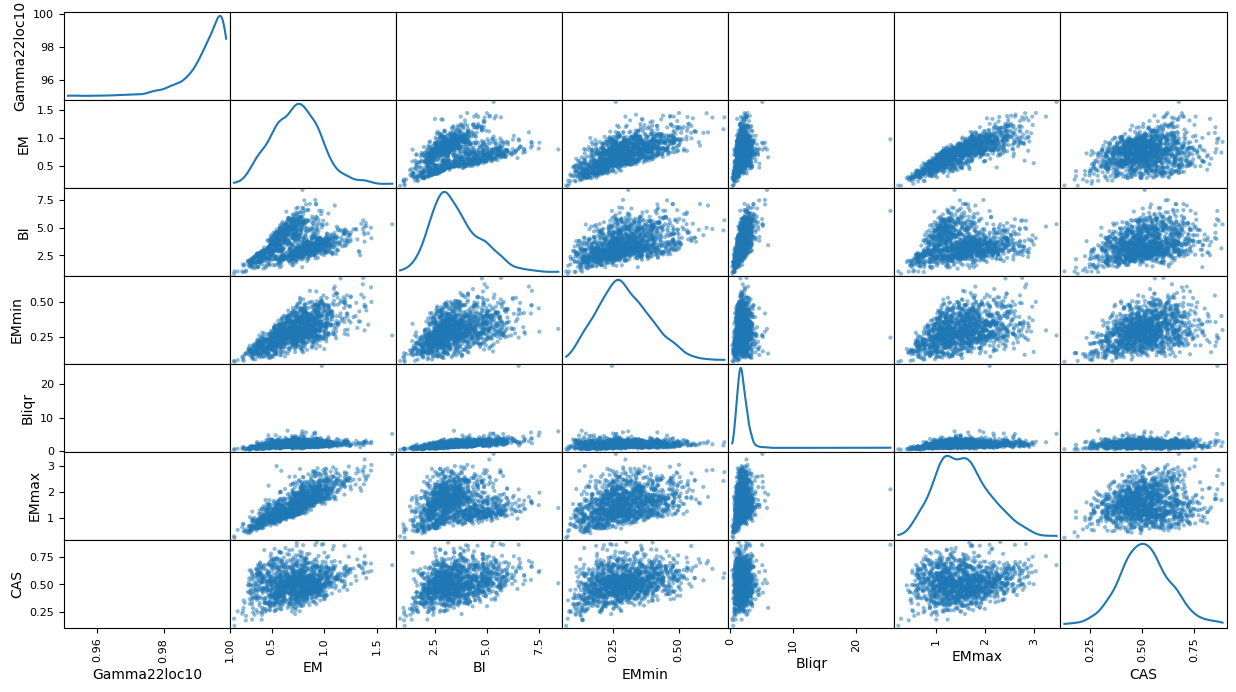

In [ ]:
#On peut visualiser la distribution de ces variables
from pandas.plotting import scatter_matrix
attributs = ["Gamma22loc10", "EM", "BI", "EMmin", "BIiqr", "EMmax", "CAS"]
matrice = scatter_matrix(df[attributs], figsize = (15, 8), diagonal='kde')
for i in range(1, 7):
      matrice[0,i].set_ylim(0.95,1.0)
      matrice[i,0].set_xlim(0.95,1.0)

plt.draw()

## Catégorisation des résultats PSQA
* Pour faire de la **classification** il faut catégoriser les résultats gamma
* On utilise une limite de tolérance, qui peut être calculée de plusieurs manières (empiriquement via le percentile de la distribution des valeurs mesurées ou via des méthodes statistiques, ici une méthode issue de l'article de Xiao et al 2022  https://doi.org/10.1002/mp.15346)

### Méthode du percentile

In [ ]:
#Calcul du 10ème percentile de la distribution de gamma
percentile(df.Gamma22loc10, 10)

98.4

### Méthode Skewness Correction (Xiao 2022)
> Choix subjectif, d'autres sont possibles et peut-être meilleurs
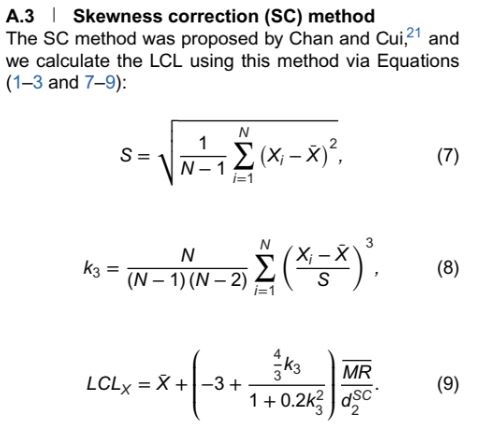
  


In [ ]:
X = df.Gamma22loc10.reset_index()
X = X.drop(columns =['index'])
X = X.Gamma22loc10
N = len(X)
Xbar = (1/N)*sum(X)

somme = 0
for i in range(1,N):
    somme = somme + abs(X[i]-X[i-1])

moving_range = (1/(N-1))*somme

somme= 0
for i in range(0,N):
    somme = somme + math.pow(X[i]-Xbar, 2)
S = math.sqrt((1/(N-1))*somme)

somme = 0
for i in range(0,N):
    somme = somme + math.pow((X[i]-Xbar)/S, 3)

k = N/((N-1)*-(N-2))*somme
k

2.0339711331370482

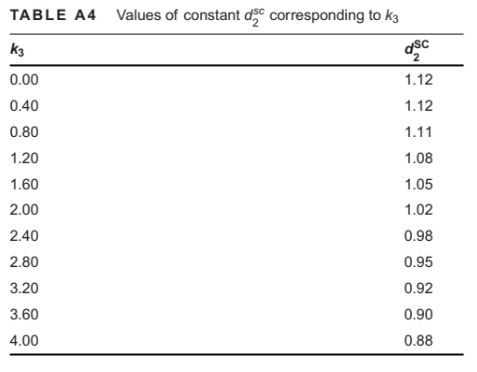

In [ ]:
#DSC calculé à partir de la table A4
DSC = 1.02+(k-2)*((0.98-1.02)/(2.4-2))
LCLx = Xbar + (-3+((4*k/3)/(1+0.2*k*k)))*(moving_range/DSC)
LCLx

98.46094332116091

### Binarisation

<Figure size 1200x600 with 0 Axes>

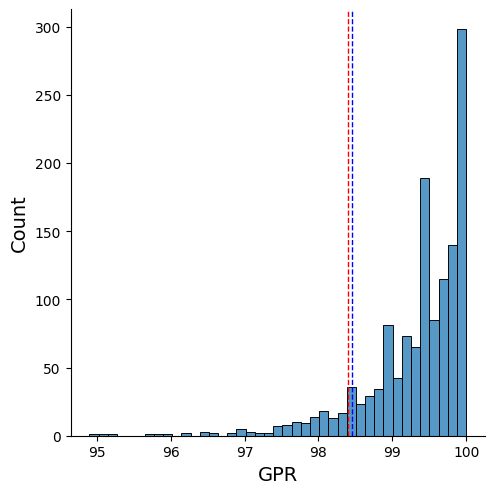

In [ ]:
#Affichage de la distribution
gamma = df.Gamma22loc10
plt.figure(figsize=(12,6))
g = sns.displot(gamma)
plt.xlabel("GPR", size=14)
plt.ylabel("Count", size=14)
plt.axvline(x=np.percentile(gamma, 10),color='red',linestyle='dashed',linewidth=1)
plt.axvline(x=LCLx,color='blue',linestyle='dashed',linewidth=1)

In [ ]:
#Sauvegarde du fichier de base sans catégorisation (pourra être utilisé en regression)
df.to_csv('DataSet_RegionPelvienne_Reg.csv')

#Binarisation
df = df.assign(Echec=pd.cut(df.Gamma22loc10,
                               bins=[0, LCLx, 100],
                               labels=[1, 0]))
df = df.drop(columns=["Gamma22loc10"])
df['Echec'] = df.Echec.astype('int64')


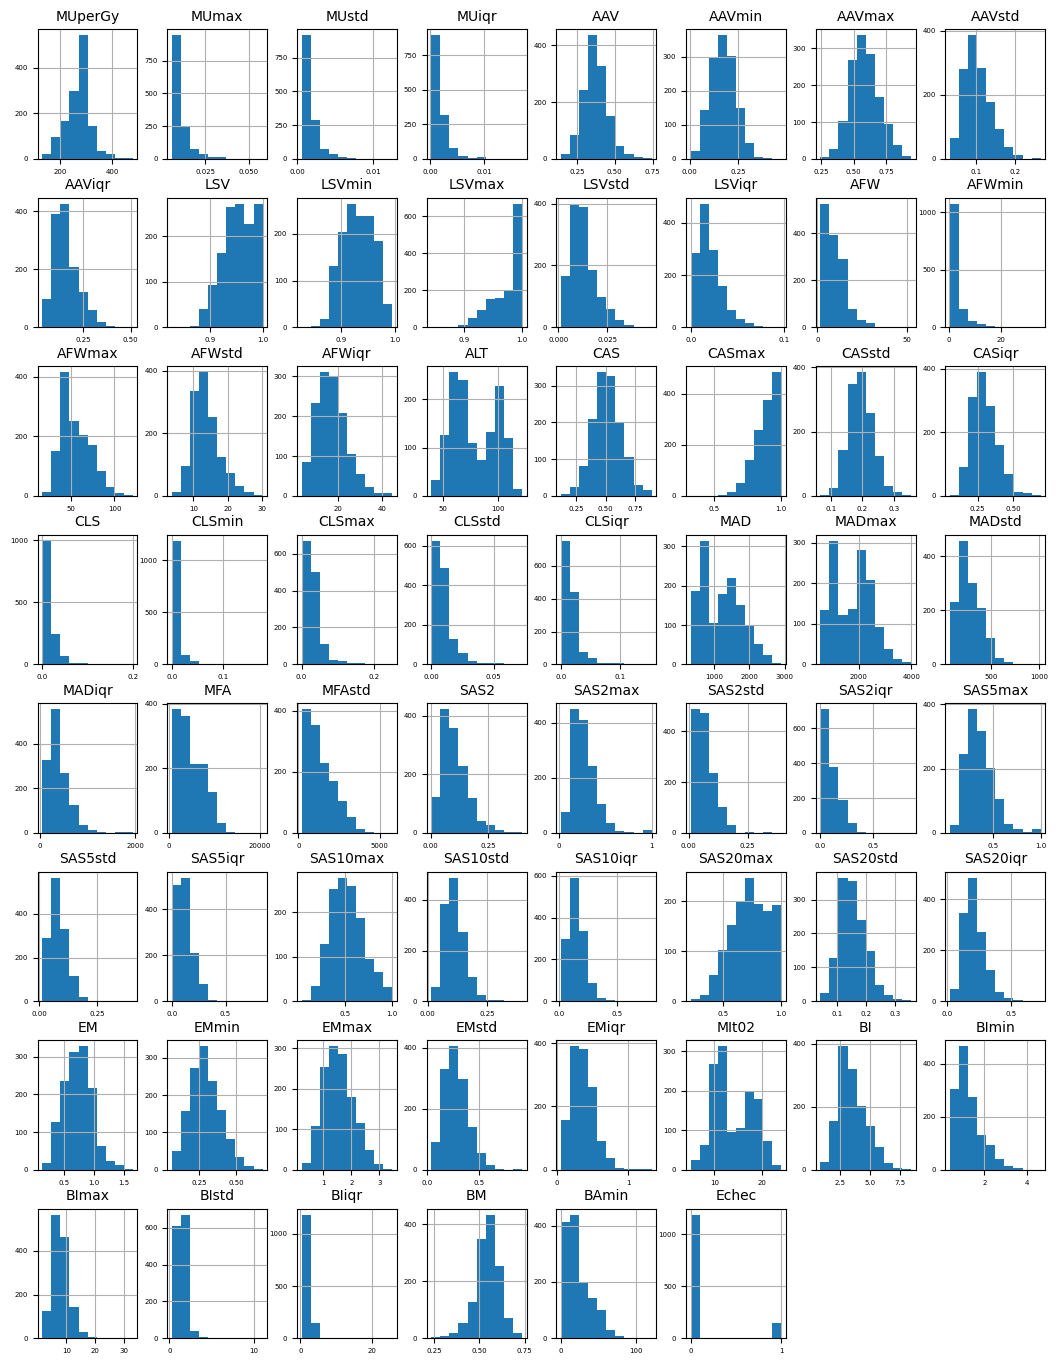

In [ ]:
#Visualisation des données
fig = df.hist(xlabelsize=5, ylabelsize=5,figsize=(13,17) )
[x.title.set_size(10) for x in fig.ravel()]
plt.show()

> Informations que l'on peut extraire de ces histogrammes :
* Différences d'echelles entre les variables
* Forme des distributions : plusieurs distributions sont fortement dissymétriques.

Ces deux paramètres peuvent nuire aux performances des modèles.

*A noter : il est possible de réaliser des transformations sur les données, par exemple les transformations Box-Cox ou Yeo-Johnson qui permettent de  rapprocher les données d'une loi normale, certains algorithmes de ML étant plus efficaces sur des données normales. La fonction scikit qui permet de faire ces transformations est PowerTransformer()*

## Sauvegarde de la base final de travail pour la classification

In [ ]:
df.to_csv('DataSet_RegionPelvienne_Class.csv')

* Un csv a été créé dans les fichiers du projet
* **Télécharger ce csv**